In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Healthcare-Data-Analysis/data/raw/stroke_data_raw.csv')

df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.isnull().sum()

df['bmi'] = df['bmi'].fillna(df['bmi'].median())

df.isnull().sum()

df.duplicated().sum()

df = df.drop_duplicates()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


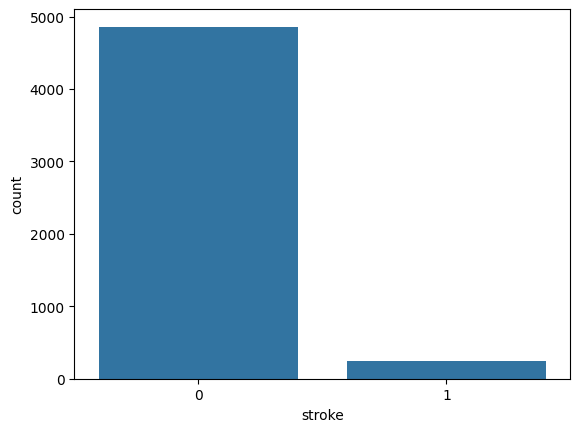

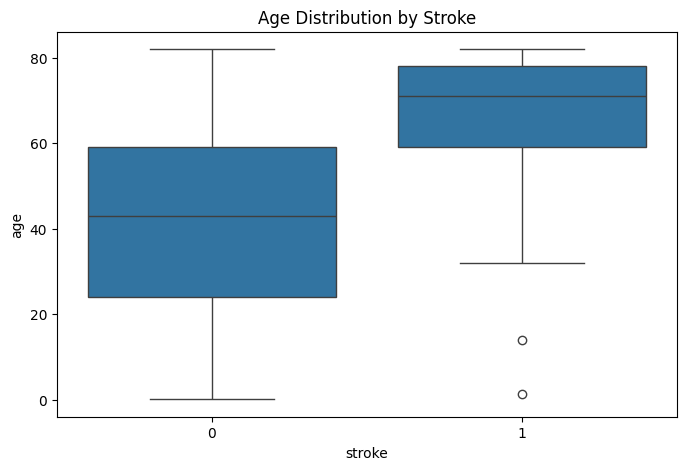

/tmp/ipython-input-2402275582.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_age = df.groupby('age_group')['stroke'].mean().reset_index()


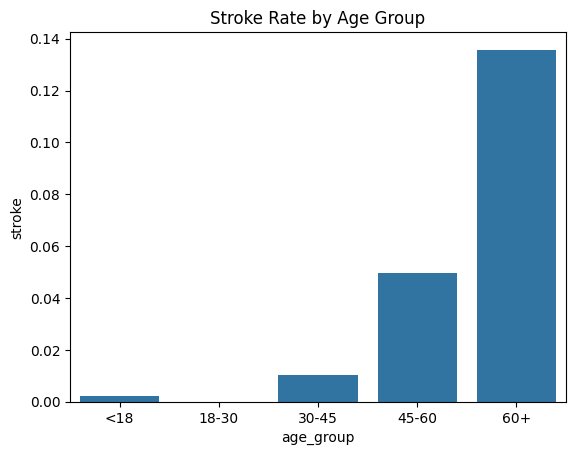

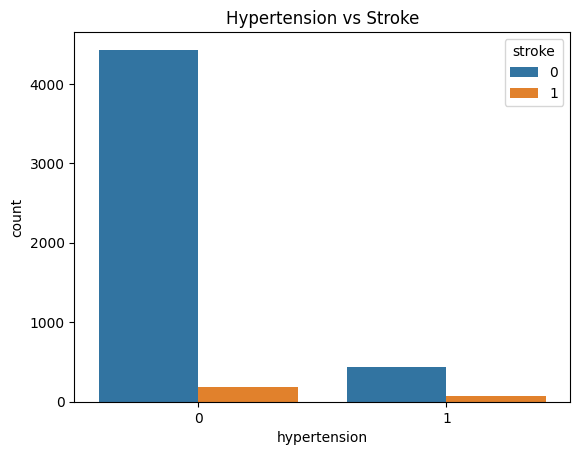

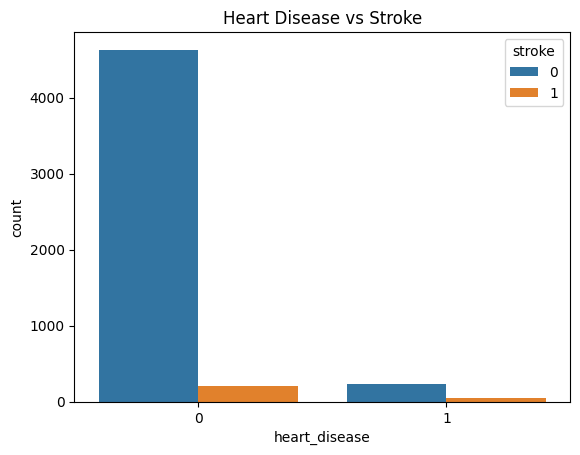

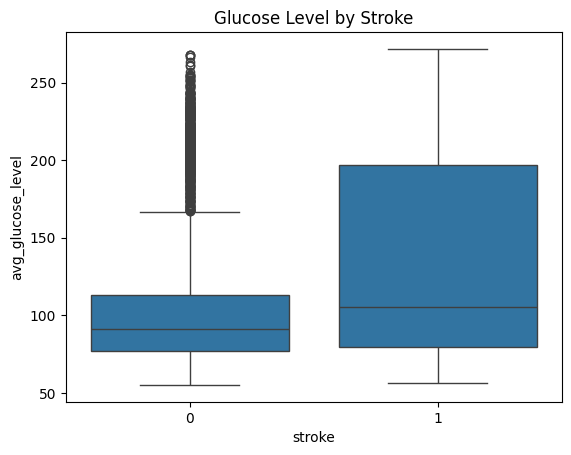

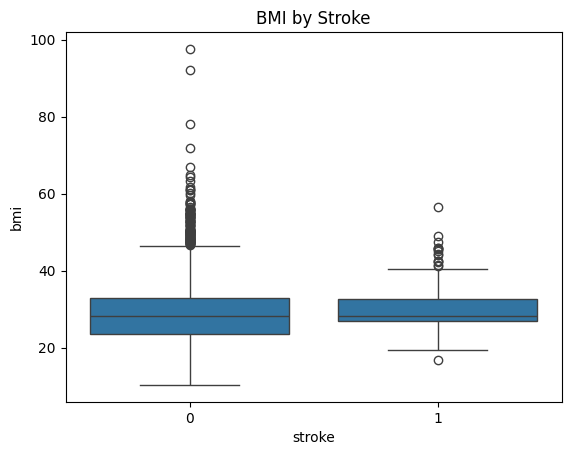

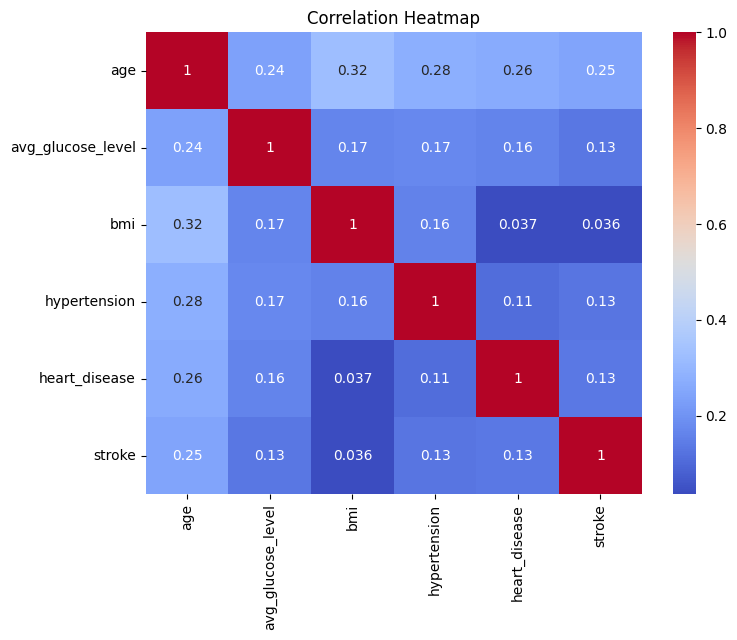

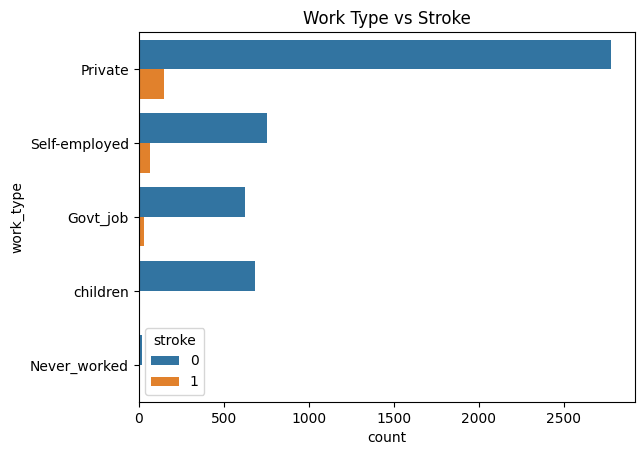

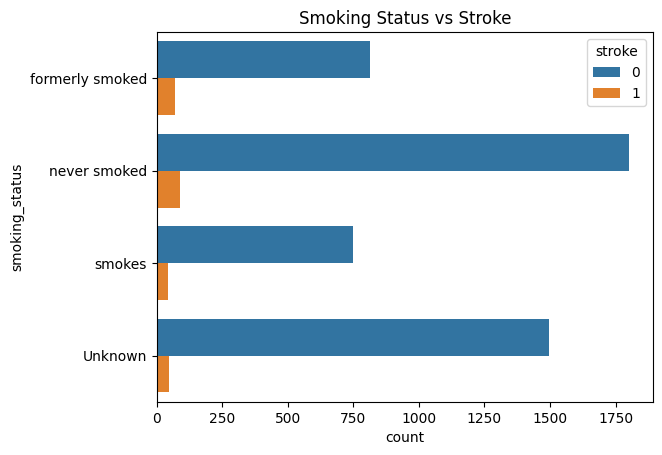

In [10]:
# Feature Engineering

df['age_group'] = pd.cut(
    df['age'],
    bins=[0,18,30,45,60,100],
    labels=['<18','18-30','30-45','45-60','60+']
)

df['high_risk'] = np.where(
    (df['hypertension'] == 1) |
    (df['heart_disease'] == 1) |
    (df['avg_glucose_level'] > 140),
    'High',
    'Low'
)

# EDA (Exploratory Data Analysis)
sns.countplot(x='stroke',data=df)
plt.show()

# Age vs Stroke
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age Distribution by Stroke")
plt.show()

# Age Group vs Stroke
stroke_by_age = df.groupby('age_group')['stroke'].mean().reset_index()

sns.barplot(x='age_group', y='stroke', data=stroke_by_age)
plt.title("Stroke Rate by Age Group")
plt.show()

# Hypertension & Heart Disease Impact
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title("Hypertension vs Stroke")
plt.show()

sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title("Heart Disease vs Stroke")
plt.show()

# Glucose Level & BMI Analysis
sns.boxplot(x='stroke', y='avg_glucose_level',data=df)
plt.title("Glucose Level by Stroke")
plt.show()

sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("BMI by Stroke")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['age','avg_glucose_level','bmi','hypertension','heart_disease','stroke']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Categoricaal Analysis
sns.countplot(y='work_type', hue='stroke', data=df)
plt.title("Work Type vs Stroke")
plt.show()

sns.countplot(y='smoking_status', hue='stroke', data=df)
plt.title("Smoking Status vs Stroke")
plt.show()


In [12]:
df.to_csv('/content/drive/MyDrive/Healthcare-Data-Analysis/data/cleaned/stroke_data_raw.csv', index=False)

**EDA Insights**



*   Stroke risk increases after age 45

*   Patients with hypertension and heart disease show higher stroke incidence

*   Higher glucose levels correlate with stroke occurence
*   BMI shows moderate impact on stroke risk


*   Urban vs rural difference is minimal


*   List item


